In [1]:
!rm -rf EVA-4
!git clone https://github.com/seepala98/EVA-4.git
!cp EVA-4/PHASE_1/S8/*.py .

Cloning into 'EVA-4'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 234 (delta 0), reused 0 (delta 0), pack-reused 228
Receiving objects: 100% (234/234), 1.00 MiB | 932.00 KiB/s, done.
Resolving deltas: 100% (82/82), done.


In [2]:
%ls

display.py  load_transform.py  plot.py    sample_data/  validation.py
EVA-4/      model.py           resnet.py  train.py


# Import Library

In [0]:
%matplotlib inline
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F

In [4]:
import load_transform
# Initialize CIFAR-10 classes
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
CUDA Available? True


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


plane   dog  deer  deer


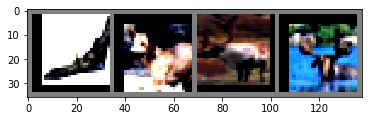

In [5]:
import display
# get some random training images
dataiter = iter(load_transform.trainloader_for_plot)
images, labels = dataiter.next()

# show images
display.imshow(torchvision.utils.make_grid(images))

# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

# Import model

In [0]:
import resnet

In [7]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(f"Device: {device}")
model = resnet.ResNet18().to(device)
summary(model, input_size=(3, 32, 32))

Device: cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14      

# Loss Function and optimization

In [0]:
import torch.nn as nn
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.95)

# train and test

In [0]:
import train 
import validation

In [10]:
losses = []
accuracies = []

epochs = 30
for epoch in range(1, epochs + 1):
    print(f'Epoch {epoch}:')
    train.train(model, load_transform.train_loader, device, optimizer, criterion)
    validation.val(model, load_transform.val_loader, device, criterion, losses, accuracies)

  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 1:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0106, Accuracy: 5333/10000 (53.33%)

Epoch 2:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0097, Accuracy: 6269/10000 (62.69%)

Epoch 3:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0077, Accuracy: 6850/10000 (68.50%)

Epoch 4:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0051, Accuracy: 7784/10000 (77.84%)

Epoch 5:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0044, Accuracy: 8125/10000 (81.25%)

Epoch 6:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0042, Accuracy: 8206/10000 (82.06%)

Epoch 7:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0038, Accuracy: 8414/10000 (84.14%)

Epoch 8:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0047, Accuracy: 8184/10000 (81.84%)

Epoch 9:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0037, Accuracy: 8519/10000 (85.19%)

Epoch 10:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0040, Accuracy: 8384/10000 (83.84%)

Epoch 11:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0041, Accuracy: 8387/10000 (83.87%)

Epoch 12:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0029, Accuracy: 8770/10000 (87.70%)

Epoch 13:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0030, Accuracy: 8760/10000 (87.60%)

Epoch 14:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0030, Accuracy: 8754/10000 (87.54%)

Epoch 15:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0033, Accuracy: 8744/10000 (87.44%)

Epoch 16:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0032, Accuracy: 8794/10000 (87.94%)

Epoch 17:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0028, Accuracy: 8883/10000 (88.83%)

Epoch 18:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0034, Accuracy: 8769/10000 (87.69%)

Epoch 19:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0029, Accuracy: 8923/10000 (89.23%)

Epoch 20:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0029, Accuracy: 8894/10000 (88.94%)

Epoch 21:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0032, Accuracy: 8850/10000 (88.50%)

Epoch 22:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0029, Accuracy: 8939/10000 (89.39%)

Epoch 23:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0028, Accuracy: 8970/10000 (89.70%)

Epoch 24:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0030, Accuracy: 8952/10000 (89.52%)

Epoch 25:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0030, Accuracy: 8965/10000 (89.65%)

Epoch 26:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0029, Accuracy: 9014/10000 (90.14%)

Epoch 27:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0029, Accuracy: 8971/10000 (89.71%)

Epoch 28:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0030, Accuracy: 8980/10000 (89.80%)

Epoch 29:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0028, Accuracy: 9084/10000 (90.84%)

Epoch 30:


Loss=0.13 Batch ID=390 Accuracy=96.67: 100%|██████████| 391/391 [00:29<00:00, 14.71it/s]



Validation set: Average loss: 0.0027, Accuracy: 9102/10000 (91.02%)



# Plot Result

In [0]:
%matplotlib inline
import plot

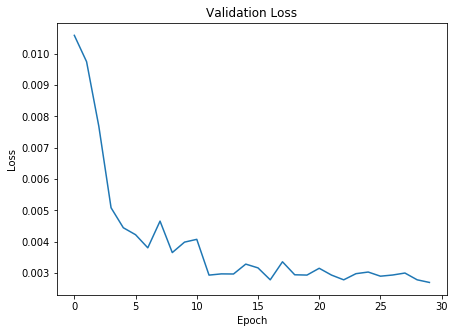

In [12]:
plot.plot_metric(losses, 'Loss')

# Plot Accuracy

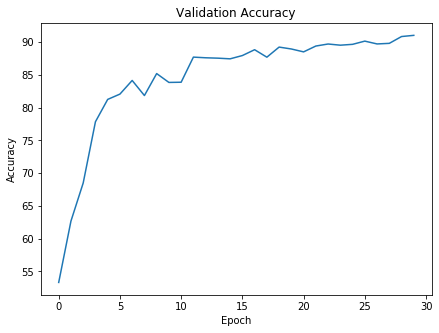

In [13]:
plot.plot_metric(accuracies, 'Accuracy')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


GroundTruth:    dog horse   car  deer


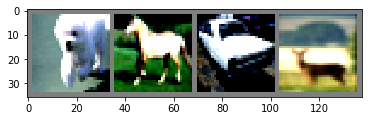

In [14]:
dataiter = iter(load_transform.testloader_for_plot)
images, labels = dataiter.next()

display.imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [0]:
outputs = model(images.cuda())

In [16]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    dog horse   car  deer


# Result Analysis


In [17]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

with torch.no_grad():
    for _, (images, labels) in enumerate(load_transform.val_loader, 0):
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()

        for i in range(len(labels)):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 95 %
Accuracy of   car : 94 %
Accuracy of  bird : 89 %
Accuracy of   cat : 75 %
Accuracy of  deer : 92 %
Accuracy of   dog : 89 %
Accuracy of  frog : 94 %
Accuracy of horse : 92 %
Accuracy of  ship : 92 %
Accuracy of truck : 95 %
